In [4]:
import numpy as np

n = 4
x = [5.0, 15.0, 20.0, 10.0]
x = np.array(x)
xx = x.copy()
a = [
    [1 / 2, 0, 0, 1 / 2],
    [1 / 2, 1 / 2, 0, 0],
    [1 / 3, 1 / 3, 1 / 3, 0],
    [0, 0, 1 / 2, 1 / 2]
]
a = np.array(a)
v = []
for i in range(n):
    t = []
    for j in range(n):
        if j == i: t.append(1.0)
        else: t.append(0.0)
    v.append(t)
v = np.array(v)
vv = v.copy()
s = x.copy()
for i in range(n):
    s[i] = s[i] / n
ss = s.copy()

def backup():
    global x, v, s
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()

def upd_x(i):
    pass

def upd_v(i):
    sum = np.zeros(n)
    for j in range(n):
        sum += a[i, j] * v[j]
    vv[i] = sum.copy()

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += a[i, j] * s[j]
    ss[i] = sum + (xx[i] / n) / (1 * vv[i, i]) - (x[i] / n) / (1 * v[i, i])

def solve(iter_num):
    for T in range(iter_num):
        for i in range(n):
            upd_x(i)
            upd_v(i)
            upd_s(i)
        backup()

solve(1000)
print(ss)

[12.5 12.5 12.5 12.5]


**1. 平均一致性算法求平衡图下的全局平局**

这是平均一致性算法1。平均一致性算法只适用于网络是平衡的情况，也就是双随机矩阵。

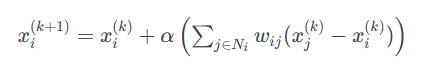

下面那个算法2也是平均一致性算法，写法不同罢了。

In [7]:
# 算法1
import copy

n = 3
alpha = 0.01
x = [-1, 10, 20, 30]
A = [
    [-1, -1, -1, -1],
    [-1, 1 / 2, 1 / 2, 0],
    [-1, 0, 1 / 2, 1 / 2],
    [-1, 1 / 2, 0, 1 / 2]
]
xx = copy.deepcopy(x)

def init():
    global x, xx
    x = [-1, 10, 20, 30]
    xx = copy.deepcopy(x)

#--------------------------------------------------

def upd_x(i):
    sum = 0
    for j in range(1, n + 1):
        sum += A[i][j] * (xx[j] - xx[i])
    x[i] = xx[i] + alpha * sum

def algorithm(iter_num):
    init()
    global xx
    for T in range(1, iter_num + 1):
        for i in range(1, n + 1):
            upd_x(i)
        xx = copy.deepcopy(x)

algorithm(1000)
for i in range(1, n + 1):
    print(x[i])

20.004803469176213
19.994111232921664
20.001085297902137


In [1]:
# 算法2
import copy

n = 3
x = [-1, 10, 20, 30]
m = [-1]
for i in range(1, n + 1):
    m.append(x[i])
A = [
    [-1, -1, -1, -1],
    [-1, 1, 0, 0],
    [-1, 0, 1, 0],
    [-1, 0, 0, 1]
]
mm = copy.deepcopy(m)

def init():
    global x, m, mm
    x = [-1, 10, 20, 30]
    m = [-1]
    for i in range(1, n + 1):
        m.append(x[i])
    mm = copy.deepcopy(m)

#--------------------------------------------------

def upd_m(i):
    sum = 0
    for j in range(1, n + 1):
        sum += A[i][j] * mm[j]
    m[i] = sum

def algorithm(iter_num):
    init()
    global mm
    for T in range(1, iter_num + 1):
        for i in range(1, n + 1):
            upd_m(i)
        mm = copy.deepcopy(m)

algorithm(100)
for i in range(1, n + 1):
    print(m[i])

20.0
20.0
20.0


**2. 不平衡图中，求全局平均值**

使用推和共识算法。

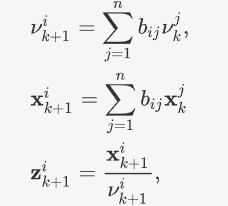

下面进行验证：

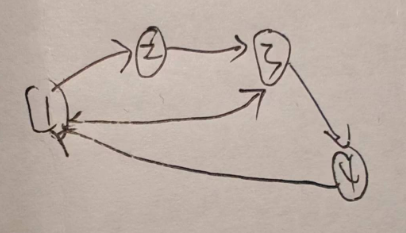

In [17]:
import copy

n = 4
x = [-1, 10, 20, 30, 40]
v = [-1, 1, 1, 1, 1]
z=  [-1, -1, -1, -1, -1]
B = [
    [-1, -1, -1, -1, -1],
    [-1, 1 / 3, 0, 0, 1 / 2],
    [-1, 1 / 3, 1 / 2, 0, 0],
    [-1, 1 / 3, 1 / 2, 1 / 2, 0],
    [-1, 0, 0, 1 / 2, 1 / 2]
]
vv = copy.deepcopy(v)
xx = copy.deepcopy(x)

def init():
    global x, xx, v, vv, z
    x = [-1, 10, 20, 30, 40]
    v = [-1, 1, 1, 1, 1]
    z=  [-1, -1, -1, -1, -1]
    vv = copy.deepcopy(v)
    xx = copy.deepcopy(x)

def upd_v(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * vv[j]
    v[i] = sum

def upd_x(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * xx[j]
    x[i] = sum

def upd_z(i):
    z[i] = x[i] / v[i]

def push_sum(iter_num):
    init()
    global vv, xx
    for T in range(1, iter_num + 1):
        for i in range(1, n + 1):
            upd_v(i)
            upd_x(i)
            upd_z(i)
        print(z)
        vv = copy.deepcopy(v)
        xx = copy.deepcopy(x)

push_sum(10)

[-1, 28.0, 16.0, 21.25, 35.0]
[-1, 32.50000000000001, 20.799999999999997, 21.0204081632653, 27.142857142857146]
[-1, 28.791208791208796, 25.801526717557252, 23.27338129496403, 23.846153846153843]
[-1, 25.36770921386306, 27.239101717305157, 25.160276555625394, 23.557168784029038]
[-1, 24.1419795221843, 26.284235497088638, 25.71413390010627, 24.34340320591862]
[-1, 24.27610272316745, 25.18539266832394, 25.448222429610325, 25.017239577891544]
[-1, 24.76724237412009, 24.7254794520548, 25.083695032407466, 25.23153295919171]
[-1, 25.075576929413078, 24.746357198828925, 24.91430781211302, 25.15749585882264]
[-1, 25.1301483806816, 24.9103206718296, 24.912313912540625, 25.035545281861353]
[-1, 25.06703378176263, 25.01993550317133, 24.966056056205367, 24.973834299447585]


**3. 不平衡图下求最优解**

先用push-sum算法解决这个问题。即用push-sum逼近平均值，最优值用梯度下降逼近

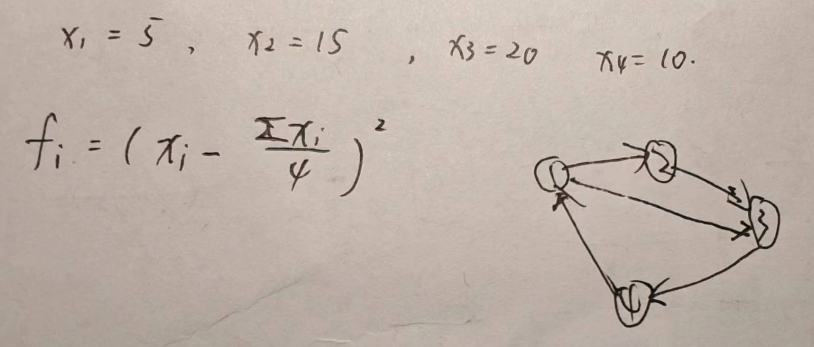

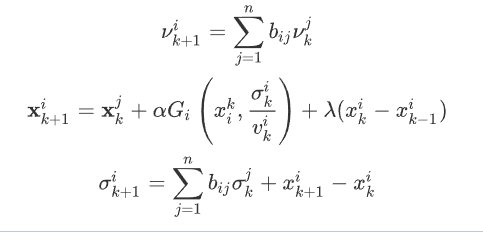

In [51]:
import copy

n = 4
alpha = 0.001
x = [-1, 5, 15, 20, 10]
sigma = [-1]
for i in range(1, n + 1):
    sigma.append(x[i])
v = [-1, 1, 1, 1, 1]
B = [
    [-1, -1, -1, -1, -1],
    [-1, 1 / 3, 0, 0, 1 / 2],
    [-1, 1 / 3, 1 / 2, 0, 0],
    [-1, 1 / 3, 1 / 2, 1 / 2, 0],
    [-1, 0, 0, 1 / 2, 1 / 2]
]
xx = copy.deepcopy(x)
xxx = copy.deepcopy(x)
vv = copy.deepcopy(v)
ssigma = copy.deepcopy(sigma)

def init():
    global x, sigma, v, vv, ssigma, xx, xxx
    x = [-1, 5, 15, 20, 10]
    sigma = [-1]
    for i in range(1, n + 1):
        sigma.append(x[i])
    v = [-1, 1, 1, 1, 1]
    vv = copy.deepcopy(v)
    xx = copy.deepcopy(x)
    xxx = copy.deepcopy(x)
    ssigma = copy.deepcopy(sigma)

def upd_v(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * vv[j]
    v[i] = sum

def upd_sigma(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * ssigma[j]
    sigma[i] = sum + x[i] - xx[i]

def G(x, sigma):
    return 2 * (x - sigma) * (1 - 1 / n)

def upd_x(i, vec):
    x[i] = xx[i] - alpha * G(xx[i], ssigma[i] / vv[i]) + vec * (xx[i] - xxx[i])

def push_sum(iter_num, vec):
    global ssigma, vv, xx, xxx, alpha
    init()
    for T in range(1, iter_num + 1):
        for i in range(1, n + 1):
            upd_v(i)
            upd_x(i, vec)
            upd_sigma(i)
        ssigma = copy.deepcopy(sigma)
        vv = copy.deepcopy(v)
        xxx = copy.deepcopy(xx)
        xx = copy.deepcopy(x)

push_sum(10000, 0)
for i in range(1, n + 1):
    print(x[i])

12.500402430576097
12.50040540307534
12.500406865274469
12.500403866030405


再使用Subgradient-push来解决这个问题。

我认为Subgradient-push算法只能用来解决最优解是所有玩家的值趋近于某个值的问题。本质就是更新x的时候加一个梯度。

如果最优解是所有玩家的动作分别趋向于x1*, x2*, ..., xn*，且这些动作互不相同。我觉得Subgradient-push算法就用不了了。

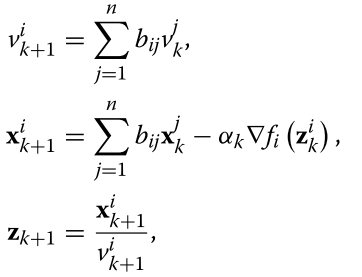

In [48]:
import copy

n = 4
alpha = 0.001
x = [-1, 5, 15, 20, 10]
v = [-1, 1, 1, 1, 1]
B = [
    [-1, -1, -1, -1, -1],
    [-1, 1 / 3, 0, 0, 1 / 2],
    [-1, 1 / 3, 1 / 2, 0, 0],
    [-1, 1 / 3, 1 / 2, 1 / 2, 0],
    [-1, 0, 0, 1 / 2, 1 / 2]
]
vv = copy.deepcopy(v)
xx = copy.deepcopy(x)

def upd_v(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * vv[j]
    v[i] = sum

def G(x, sigma):
    return 2 * (x - sigma) * (1 - 1 / n)

def upd_x(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * xx[j]
    x[i] = sum - alpha * G(xx[i], xx[i] / vv[i])

def subgradient_push(iter_num):
    global xx, vv, alpha
    for T in range(1, iter_num + 1):
        for i in range(1, n + 1):
            upd_v(i)
            upd_x(i)
        vv = copy.deepcopy(v)
        xx = copy.deepcopy(x)

subgradient_push(10)
for i in range(1, n + 1):
    print(x[i] / v[i])

12.523448866892776
12.48864588227005
12.478493830031589
12.506839500016797


再使用Push-DIGing来解决这个问题

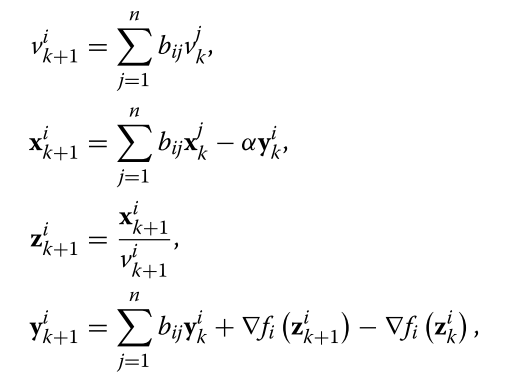

In [45]:
import copy

def G(x, sigma):
    return 2 * (x - sigma) * (1 - 1 / n)

n = 4
alpha = 0.001
x = [-1, 5, 15, 20, 10]
v = [-1, 1, 1, 1, 1]
y = [-1]
for i in range(1, n + 1):
    y.append(G(x[i], x[i] / v[i]))
B = [
    [-1, -1, -1, -1, -1],
    [-1, 1 / 3, 0, 0, 1 / 2],
    [-1, 1 / 3, 1 / 2, 0, 0],
    [-1, 1 / 3, 1 / 2, 1 / 2, 0],
    [-1, 0, 0, 1 / 2, 1 / 2]
]
vv = copy.deepcopy(v)
xx = copy.deepcopy(x)
yy = copy.deepcopy(y)

def upd_v(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * vv[j]
    v[i] = sum

def upd_x(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * xx[j]
    x[i] = sum - alpha * yy[i]

def upd_y(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * yy[j]
    y[i] = sum + G(x[i], x[i] / v[i]) - G(xx[i], xx[i] / vv[i])

def Push_DIGing(iter_num):
    global xx, vv, yy
    for T in range(1, iter_num + 1):
        for i in range(1, n + 1):
            upd_v(i)
            upd_x(i)
            upd_y(i)
        vv = copy.deepcopy(v)
        xx = copy.deepcopy(x)
        yy = copy.deepcopy(y)

Push_DIGing(10)
for i in range(1, n + 1):
    print(x[i] / v[i])

12.528625540290717
12.47279510250154
12.478208652161818
12.511095921447412


上面分别用了Push-sum、Subgradient-push、Push-DIGing算法来解决问题。这仨算法都是基于推和算法。

Push-sum就是推和算法，Subgradient-push是在推和的基础上，加一个梯度使得x / v收敛到最优解，Push-DIGing也是在更新x的时候加一个梯度，但是它这个梯度是考虑了全局的梯度。

OK。接下来，就采用行随机矩阵算法来解决上面的问题。行随机算法就不是基于推和算法了。一定要分清两类算法的区别！

先用论文中给出的传统行随机算法实现这题。求f导数仍然用到了全局平均值，仍然使用push-sum的方法求全局平均值

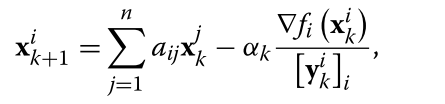

上面这个公式就是DGD，但是有俩点不同。一是把矩阵W换成了矩阵A，二是把梯度那里除了一个y

In [54]:
import copy

n = 4
alpha = 0.01
x = [-1, 5, 15, 20, 10]
sigma = [-1]
for i in range(1, n + 1):
    sigma.append(x[i])
v = [
    [-1, -1, -1, -1, -1],
    [-1, 1, 0, 0, 0],
    [-1, 0, 1, 0, 0],
    [-1, 0, 0, 1, 0],
    [-1, 0, 0, 0, 1]
]
y = [-1, 1, 1, 1, 1]
A = [
    [-1, -1, -1, -1, -1],
    [-1, 1 / 2, 0, 0, 1 / 2],
    [-1, 1 / 2, 1 / 2, 0, 0],
    [-1, 1 / 3, 1 / 3, 1 / 3, 0],
    [-1, 0, 0, 1 / 2, 1 / 2]
]
B = [
    [-1, -1, -1, -1, -1],
    [-1, 1 / 3, 0, 0, 1 / 2],
    [-1, 1 / 3, 1 / 2, 0, 0],
    [-1, 1 / 3, 1 / 2, 1 / 2, 0],
    [-1, 0, 0, 1 / 2, 1 / 2]
]
vv = copy.deepcopy(v)
xx = copy.deepcopy(x)
yy = copy.deepcopy(y)
ssigma = copy.deepcopy(sigma)

def upd_y(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * yy[j]
    y[i] = sum

def upd_v(i):
    vvv = copy.deepcopy(vv)
    for j in range(1, n + 1):
        for l in range(1, n + 1):
            vvv[j][l] *= A[i][j]
    res = [-1]
    for j in range(1, n + 1):
        sum = 0
        for l in range(1, n + 1):
            sum += vvv[l][j]
        res.append(sum)
    v[i] = res

def upd_sigma(i):
    sum = 0
    for j in range(1, n + 1):
        sum += B[i][j] * ssigma[j]
    sigma[i] = sum + x[i] - xx[i]

def G(x, sigma):
    return 2 * (x - sigma) * (1 - 1 / n)

def upd_x(i):
    sum = 0
    for j in range(1, n + 1):
        sum += A[i][j] * xx[j]
    x[i] = sum - alpha * G(xx[i], ssigma[i] / yy[i]) / vv[i][i]

def Row_normal(iter_num):
    global vv, ssigma, yy, xx
    for T in range(1, iter_num + 1):
        for i in range(1, n + 1):
            upd_y(i)
            upd_v(i)
            upd_x(i)
            upd_sigma(i)
        vv = copy.deepcopy(v)
        ssigma = copy.deepcopy(sigma)
        yy = copy.deepcopy(y)
        xx = copy.deepcopy(x)

Row_normal(100)
for i in range(1, n + 1):
    print(x[i])
print()
for i in range(1, n + 1):
    print(sigma[i] / y[i])

11.744673393558816
11.74467339247461
11.744673392822397
11.744673393594043

11.744673395652521
11.744673392348231
11.744673391685902
11.744673393016114


还可以用FROST算法解决上面这道题，具体流程如下：

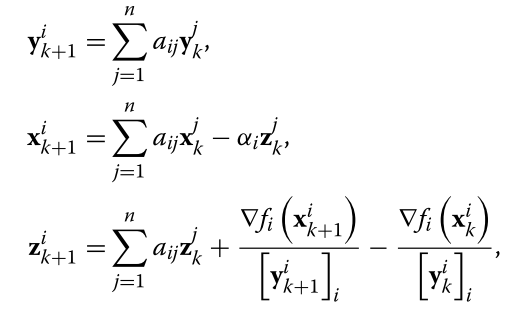

可以看出，就是将普通的行随机算法的普通梯度改为了考虑全局的梯度

但是总结一下，我觉得目前这两种行随机算法都不能真正解决聚合游戏。因为平均值必须通过列随机矩阵算法push-sum来求。而且，这两种算法还要求最优解一定是所有玩家的动作收敛到同一个值。

所以当且仅当下面两个条件满足时，上面俩行随机方法适用：

1. 不是聚合游戏，即每个人的代价函数不会用到全局平均值的信息

2. 可以保证最优解时，所有玩家的动作收敛到同一个值

---

所以我在想，如何设计一种行随机算法，使得它可以求出全局平均值。

这样子，我就可以只用行随机矩阵来解决聚合游戏了，而且即使最优解各玩家的动作不同，也是可以求出来的。

Distributed Nash... 那篇文章就给出方法了。具体去参考那篇论文吧。